In [18]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.12.0


In [19]:
# Training Data 생성 (diabetes.csv)

import numpy as np

try:
  loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

  x_data = loaded_data[:, 0:-1]
  t_data = loaded_data[:, [-1]]

  print('x_data.shape =', x_data.shape)
  print('t_data.shape =', t_data.shape)
except Exception as err:
  print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [20]:
# 모델 구축
model = Sequential()

model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1],), activation='sigmoid'))

In [21]:
# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 모델 학습
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
19/19 - 1s - loss: 0.7101 - accuracy: 0.4909 - val_loss: 0.6835 - val_accuracy: 0.5789 - 601ms/epoch - 32ms/step
Epoch 2/500
19/19 - 0s - loss: 0.7002 - accuracy: 0.5255 - val_loss: 0.6755 - val_accuracy: 0.5987 - 65ms/epoch - 3ms/step
Epoch 3/500
19/19 - 0s - loss: 0.6919 - accuracy: 0.5585 - val_loss: 0.6689 - val_accuracy: 0.6118 - 72ms/epoch - 4ms/step
Epoch 4/500
19/19 - 0s - loss: 0.6847 - accuracy: 0.5783 - val_loss: 0.6633 - val_accuracy: 0.6053 - 71ms/epoch - 4ms/step
Epoch 5/500
19/19 - 0s - loss: 0.6786 - accuracy: 0.5881 - val_loss: 0.6584 - val_accuracy: 0.6447 - 61ms/epoch - 3ms/step
Epoch 6/500
19/19 - 0s - loss: 0.6733 - accuracy: 0.5914 - val_loss: 0.6543 - val_accuracy: 0.6382 - 72ms/epoch - 4ms/step
Epoch 7/500
19/19 - 0s - loss: 0.6687 - accuracy: 0.5980 - val_loss: 0.6507 - val_accuracy: 0.6316 - 62ms/epoch - 3ms/step
Epoch 8/500
19/19 - 0s - loss: 0.6646 - accuracy: 0.6129 - val_loss: 0.6475 - val_accuracy: 0.6316 - 72ms/epoch - 4ms/step
Epoch 9/500
19

In [23]:
# 모델 (정확도) 평가
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7708


[0.4812706410884857, 0.7707509994506836]

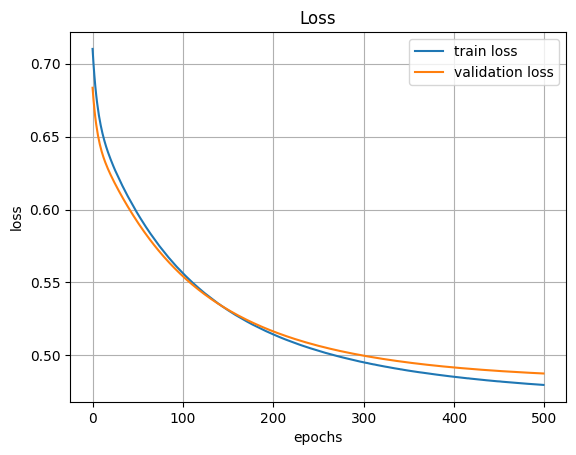

In [24]:
 # 손실 및 모델 정확도
 import matplotlib.pyplot as plt

 plt.title('Loss')
 plt.xlabel('epochs')
 plt.ylabel('loss')
 plt.grid()

 plt.plot(hist.history['loss'], label='train loss')
 plt.plot(hist.history['val_loss'], label='validation loss')

 plt.legend(loc='best')
 plt.show()

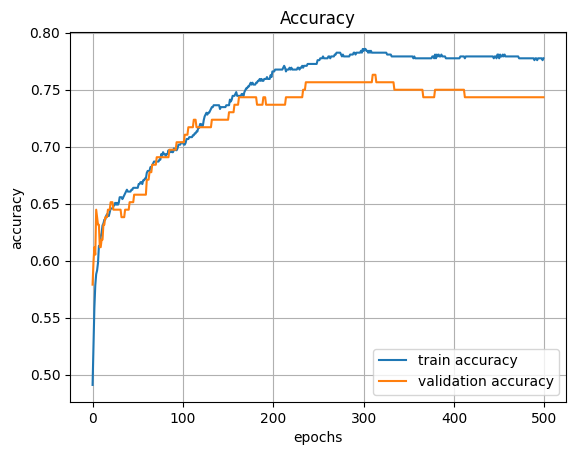

In [25]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()